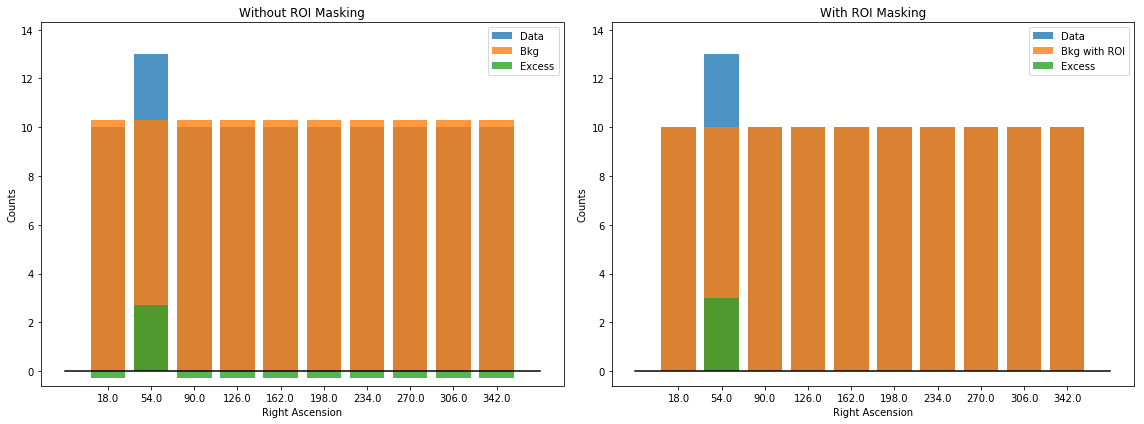

Signal Injected : 3.0
Signal Measured without ROI Mask 2.7
Signal Measured with ROI Mask 3.0


In [110]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


def GetBkg(effarray,sidarray):
    b = np.zeros(len(effarray))

    for i,s in enumerate(sidarray):
        for j,e in enumerate(effarray):
            b [(i-j)%len(effarray)] += s*e
    return b

def ExampleDI(N=10,ns=3.,nbins=10):
    """Direct Integration toy
    -- only one declination bin (1D)
    -- assume constant all-sky rate
    -- assume 4pi exposure

    -- nbins, # of bins in right ascension / sidereal time / hour angle
    -- N, isotropic background events per bin
    -- ns, signal events in second bin"""
    
    if nbins<2:
        print "ERROR: nbins > 1, please."
    ROI = np.array([0,1]+[0]*(nbins-2))

    # Data map
    dat  = ns*ROI+N
    Nt = sum(dat)
    # Sidereal array (All-sky rate)
    sid  = np.array([Nt/len(ROI)]*len(ROI))
    # Efficiency array (Local Detector Acceptance Map)
    eff  = np.array([Nt/len(ROI)]*len(ROI))/Nt

    # Efficiency array as filled with ROI Mask on bin with signal
    effROI = np.array([(Nt-sum(dat*ROI))/len(ROI)]*len(ROI))/Nt

    # Efficiency array with ROI Mask corrected
    onSrcRoi = np.zeros(len(dat))
    for j,e in enumerate(effROI):
        for i,s in enumerate(sid):
            if ROI[(i-j)%len(dat)]==1:
                onSrcRoi[j] += s
                
    cor_fact = (Nt)/(Nt-onSrcRoi)
    effROIcorr = effROI * (Nt)/(Nt-onSrcRoi)


#     fig1,axes1 = plt.subplots(1,2)
#     axes1[0].set_title('Input Sidereal Array')
#     axes1[0].bar(np.arange(len(dat)),sid)
#     axes1[0].set_xlabel('Sidereal Time')
#     axes1[0].set_ylabel('Counts')
#     axes1[1].set_title('Input Efficiency Array')
#     axes1[1].bar(np.arange(len(dat)),eff)
#     axes1[1].set_xlabel('Hour Angle')
#     axes1[1].set_ylabel('Fractional of Counts')
#     fig1.tight_layout()

    bkg = GetBkg(eff,sid)
    bkgROI = GetBkg(effROIcorr,sid)

    fig2,axes2 = plt.subplots(1,2,figsize=(16,6))

    axes2[0].set_title('Without ROI Masking')
    axes2[0].bar(np.arange(len(dat)),dat,alpha=.8,label='Data')
    axes2[0].bar(np.arange(len(dat)),bkg,alpha=.8,label='Bkg')
    axes2[0].bar(np.arange(len(dat)),dat-bkg,alpha=.8,label='Excess')
    axes2[0].plot(np.arange(-1,len(dat)+1),np.zeros(len(dat)+2),'k-')
    
    axes2[0].legend(numpoints=1)
    axes2[0].set_xlabel('Right Ascension')
    axes2[0].set_ylabel('Counts')
    axes2[0].set_ylim(2 * min(dat-bkg),1.1*max(dat))
    axes2[0].set_xticks(np.arange(len(dat)))
    axes2[0].set_xticklabels(np.arange(0,360.1,360./len(dat)) + .5*360./len(dat))
    
    axes2[1].set_title('With ROI Masking')
    axes2[1].bar(np.arange(len(dat)),dat,alpha=.8,label='Data')
    axes2[1].bar(np.arange(len(dat)),bkgROI,alpha=.8,label='Bkg with ROI')
    axes2[1].bar(np.arange(len(dat)),dat-bkgROI,alpha=.8,label='Excess')
    axes2[1].plot(np.arange(-1,len(dat)+1),np.zeros(len(dat)+2),'k-')

    axes2[1].legend(numpoints=1)
    axes2[1].set_xlabel('Right Ascension')
    axes2[1].set_ylabel('Counts')
    axes2[1].set_ylim(2 * min(dat-bkg),1.1*max(dat))
    axes2[1].set_xticks(np.arange(len(dat)))
    axes2[1].set_xticklabels(np.arange(0,360.1,360./len(dat)) + .5*360./len(dat))
    fig2.tight_layout()
    plt.show()
    
    print 'Signal Injected :',ns
    print 'Signal Measured without ROI Mask',sum(dat*ROI-bkg*ROI)
    print 'Signal Measured with ROI Mask', sum(dat*ROI-bkgROI*ROI)
    
ExampleDI()

In [99]:

# def GetBkgShortDT(effarray,sidarray, intperiods=4):
#     b = np.zeros(len(effarray))
    
#     for p in np.arange(intperiods):
#         idxlo = p*int(len(effarray)/intperiods)
#         idxhi  =(p+1)*int(len(effarray)/intperiods)
        
#         for i,s in enumerate(sidarray[idxlo:idxhi]):
#             for j,e in enumerate(effarray[idxlo:idxhi]):
#                 b [(i-j)%len(effarray[idxlo:idxhi])] += s*e
#     return b

def ShortDTExampleDI(N=10,ns=3.,nbins=10):
    """Direct Integration toy
    -- only one declination bin (1D)
    -- assume constant all-sky rate
    -- assume 4pi exposure
    
    -- nbins, # of bins in right ascension / sidereal time / hour angle
    -- N, isotropic background events per bin
    -- ns, signal events in second bin"""
    
    if nbins<2:
        print "ERROR: nbins > 1, please."
    ROI = np.array([0,1]+[0]*(nbins-2))

    # Data map
    dat  = ns*ROI+N
    Nt = sum(dat)
    
    
    intperiods =2
    for p in np.arange(intperiods):
        idxlo = p*int(len(dat)/intperiods)
        idxhi  =(p+1)*int(len(dat)/intperiods)
        
        currNt = (idxhi-idxlo)*N
        if sum(ROI[idxlo:idxhi])==1:
            currNt += ns

        for i,s in enumerate(sidarray[idxlo:idxhi]):

    sid  = np.array([Nt/len(ROI)]*len(ROI))        
    #Sidereal array (All-sky rate)
    # Efficiency array (Local Detector Acceptance Map)
    eff  = np.array([Nt/len(ROI)]*len(ROI))/Nt

    # Efficiency array as filled with ROI Mask on bin with signal
    effROI = np.array([(Nt-sum(dat*ROI))/len(ROI)]*len(ROI))/Nt

    # Efficiency array with ROI Mask corrected
    onSrcRoi = np.zeros(len(dat))
    for j,e in enumerate(effROI):
        for i,s in enumerate(sid):
            if ROI[(i-j)%len(dat)]==1:
                onSrcRoi[j] += s
                
    cor_fact = (Nt)/(Nt-onSrcRoi)
    effROIcorr = effROI * (Nt)/(Nt-onSrcRoi)


#     fig1,axes1 = plt.subplots(1,2)
#     axes1[0].set_title('Input Sidereal Array')
#     axes1[0].bar(np.arange(len(dat)),sid)
#     axes1[0].set_xlabel('Sidereal Time')
#     axes1[0].set_ylabel('Counts')
#     axes1[1].set_title('Input Efficiency Array')
#     axes1[1].bar(np.arange(len(dat)),eff)
#     axes1[1].set_xlabel('Hour Angle')
#     axes1[1].set_ylabel('Fractional of Counts')
#     fig1.tight_layout()

    bkg = GetBkg(eff,sid)
    bkgROI = GetBkg(effROIcorr,sid)

    fig2,axes2 = plt.subplots(1,2,figsize=(16,6))

    axes2[0].set_title('Without ROI Masking')
    axes2[0].bar(np.arange(len(dat)),dat,alpha=.8,label='Data')
    axes2[0].bar(np.arange(len(dat)),bkg,alpha=.8,label='Bkg')
    #axes2[0].bar(np.arange(len(dat)),dat-bkg,alpha=.8,label='Excess')
    axes2[0].plot(np.arange(-1,len(dat)+1),np.zeros(len(dat)+2),'k-')
    
    axes2[0].legend(numpoints=1)
    axes2[0].set_xlabel('Right Ascension')
    axes2[0].set_ylabel('Counts')
    axes2[0].set_ylim(2 * min(dat-bkg),1.1*max(dat))
    axes2[0].set_xticks(np.arange(len(dat)))
    axes2[0].set_xticklabels(np.arange(0,360.1,360./len(dat)) + .5*360./len(dat))
    
    axes2[1].set_title('With ROI Masking')
    axes2[1].bar(np.arange(len(dat)),dat,alpha=.8,label='Data')
    axes2[1].bar(np.arange(len(dat)),bkgROI,alpha=.8,label='Bkg with ROI')
    #axes2[1].bar(np.arange(len(dat)),dat-bkgROI,alpha=.8,label='Excess')
    axes2[1].plot(np.arange(-1,len(dat)+1),np.zeros(len(dat)+2),'k-')

    axes2[1].legend(numpoints=1)
    axes2[1].set_xlabel('Right Ascension')
    axes2[1].set_ylabel('Counts')
    axes2[1].set_ylim(2 * min(dat-bkg),1.1*max(dat))
    axes2[1].set_xticks(np.arange(len(dat)))
    axes2[1].set_xticklabels(np.arange(0,360.1,360./len(dat)) + .5*360./len(dat))
    fig2.tight_layout()
    plt.show()
    
    print 'ns True:',ns
    print 'ns Measured no ROI Mask',sum(dat*ROI-bkg*ROI)
    print 'ns Measured with ROI Mask', sum(dat*ROI-bkgROI*ROI)
    
ExampleDI()

IndexError: too many indices for array